In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

#xgb
import xgboost as xgb

## Entrenamiento

In [11]:
train=pd.read_pickle("../data/train_completo.pkl")#,dtype=tipos_conv)

In [36]:
pred = pd.read_pickle("../data/prediccion_completo.pkl")
pred.sort_index(inplace = True)

In [12]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [13]:
y = train['convirtio']
X = train.drop(axis=1, labels=['convirtio'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [14]:
modelo = xgb.XGBClassifier(learning_rate=0.05, n_estimators=130, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.7, colsample_bytree=0.6, reg_alpha =0.1,seed=RANDOM_SEED)

In [15]:
# Training
modelo.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=12,
              silent=None, subsample=0.7, verbosity=1)

In [18]:
# Predict value
pred_test = modelo.predict_proba(X_test)

In [20]:
y_test_predictd = pred_test[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.6924771305677979

In [21]:
modelo.score(X_test, y_test)

0.9668855266914074

### Predecir competencia

In [37]:
prediccion = modelo.predict_proba(pred)

In [38]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [47]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [48]:
submit["pred"] = prediccion[1]

In [49]:
submit["SCORE"] = submit["pred"]

In [52]:
submit.drop("pred", axis = 1, inplace = True)

In [54]:
submit.to_csv('../data/submit_xgb1.csv')

In [55]:
modelo.save_model("modelo1_xgb")

In [56]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: convirtio_en_mes_3   Importance: 0.14674590528011322
Variable: convirtio_multiple_en_mes_3 Importance: 0.14297929406166077
Variable: convirtio_en_mes_2   Importance: 0.13624359667301178
Variable: convirtio_multiple_en_mes_2 Importance: 0.09728570282459259
Variable: convirtio_en_mes_1   Importance: 0.09682449698448181
Variable: convirtio_multiple_en_mes_1 Importance: 0.08815179765224457
Variable: cant_paginas_vistas_en_mes_3 Importance: 0.06747189909219742
Variable: cantidad_paginas_vistas_trimestre Importance: 0.04919759929180145
Variable: cant_paginas_vistas_en_mes_2 Importance: 0.04373659938573837
Variable: page_mas_vista_en_mes_1 Importance: 0.04039499908685684
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.036765001714229584
Variable: page_mas_vista_en_mes_3 Importance: 0.03228599950671196
Variable: page_mas_vista_en_mes_2 Importance: 0.021917300298810005


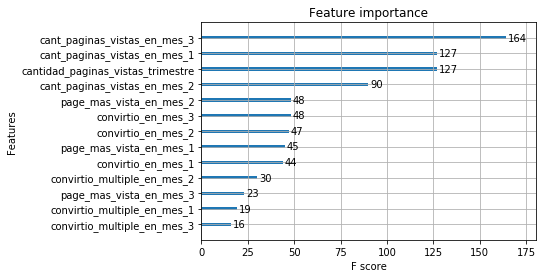

In [63]:
xgb.plot_importance(modelo)

### Entrenando con todo

In [64]:
modelo.fit(X, y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=12,
              silent=None, subsample=0.7, verbosity=1)

In [65]:
prediccion = modelo.predict_proba(pred)

In [66]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [67]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [68]:
submit["pred"] = prediccion[1]

In [69]:
submit["SCORE"] = submit["pred"]

In [70]:
submit.drop("pred", axis = 1, inplace = True)

In [72]:
submit.to_csv('../data/submit_xgb_completo.csv')

In [73]:
modelo.save_model("modelo_xgb_completo")

In [74]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: convirtio_multiple_en_mes_2 Importance: 0.15557439625263214
Variable: convirtio_multiple_en_mes_3 Importance: 0.1500099003314972
Variable: convirtio_en_mes_3   Importance: 0.1391575038433075
Variable: convirtio_en_mes_2   Importance: 0.1127488985657692
Variable: convirtio_en_mes_1   Importance: 0.10570280253887177
Variable: convirtio_multiple_en_mes_1 Importance: 0.10157670080661774
Variable: cant_paginas_vistas_en_mes_3 Importance: 0.055962201207876205
Variable: cantidad_paginas_vistas_trimestre Importance: 0.0426178015768528
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.031894098967313766
Variable: cant_paginas_vistas_en_mes_2 Importance: 0.02951589971780777
Variable: page_mas_vista_en_mes_1 Importance: 0.027621200308203697
Variable: page_mas_vista_en_mes_3 Importance: 0.026491999626159668
Variable: page_mas_vista_en_mes_2 Importance: 0.02112649939954281


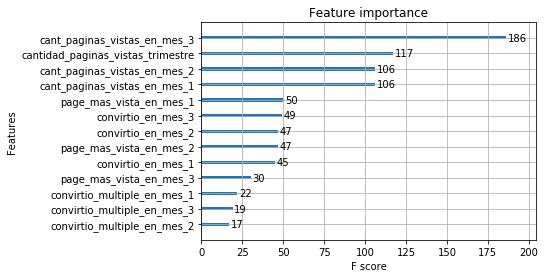

In [75]:
xgb.plot_importance(modelo)

---

---

### Binary encoding

In [26]:
train=pd.read_pickle("../data/train_codificado.pkl")#,dtype=tipos_conv)

In [27]:
pred = pd.read_pickle("../data/prediccion_codificado.pkl")
pred.sort_index(inplace = True)

In [28]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [29]:
y = train['convirtio']
X = train.drop(axis=1, labels=['convirtio'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [30]:
modelo = xgb.XGBClassifier(learning_rate=0.05, n_estimators=130, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.7, colsample_bytree=0.6, reg_alpha =0.1,seed=RANDOM_SEED)

In [31]:
# Training
modelo.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=12,
              silent=None, subsample=0.7, verbosity=1)

In [32]:
# Predict value
pred_test = modelo.predict_proba(X_test)

In [33]:
y_test_predictd = pred_test[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.54778506015216

In [34]:
modelo.score(X_test, y_test)

0.9666000570939195

### Predecir competencia

In [35]:
prediccion = modelo.predict_proba(pred)

In [36]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [37]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [38]:
submit["pred"] = prediccion[1]

In [39]:
submit["SCORE"] = submit["pred"]

In [40]:
submit.drop("pred", axis = 1, inplace = True)

In [41]:
submit.to_csv('../data/submit_xgb_codificado.csv')

In [42]:
modelo.save_model("modelo1_xgb_codificado")

In [43]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: page_top_en_mes_3_7  Importance: 0.04911259934306145
Variable: page_top_en_mes_1_7  Importance: 0.04375569894909859
Variable: page_top_en_mes_3_5  Importance: 0.042565200477838516
Variable: termino_top_en_mes_3_0 Importance: 0.04110899940133095
Variable: sitio_mas_visitado_en_mes_3_2 Importance: 0.0378711000084877
Variable: page_top_en_mes_1_4  Importance: 0.03501430153846741
Variable: busquedas_termino_top_mes_2 Importance: 0.033340200781822205
Variable: vistas_site_top_mes_2 Importance: 0.03171199932694435
Variable: vistas_page_top_en_mes_2 Importance: 0.0312304999679327
Variable: page_top_en_mes_3_6  Importance: 0.031167399138212204
Variable: vistas_page_top_en_mes_1 Importance: 0.031126899644732475
Variable: busquedas_termino_top_mes_1 Importance: 0.030845999717712402
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.029920199885964394
Variable: cantidad_paginas_vistas_trimestre Importance: 0.029167400673031807
Variable: sitio_mas_visitado_en_mes_1_2 Importance: 0.0288

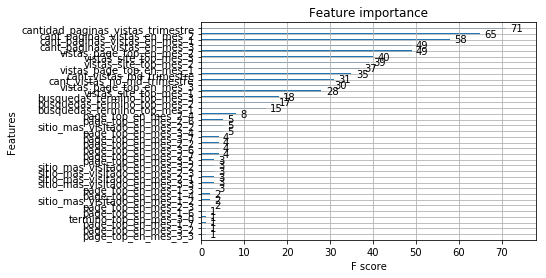

In [44]:
xgb.plot_importance(modelo)

### Train codificado balanceado

In [56]:
train=pd.read_pickle("../data/train_codificado.pkl")#,dtype=tipos_conv)

In [57]:
pred = pd.read_pickle("../data/prediccion_codificado.pkl")
pred.sort_index(inplace = True)

In [62]:
len(train)

35028

In [64]:
convirtio = train [train["convirtio"] == 1]

In [81]:
no_convirtio = train [train["convirtio"] != 1]

In [82]:
len(convirtio)

1157

In [83]:
len(no_convirtio)

33871

In [84]:
no_convirtio = no_convirtio.sample(15000, random_state = 10)

In [85]:
train_balanceado = convirtio.append(no_convirtio)

In [86]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [87]:
y = train_balanceado['convirtio']
X = train_balanceado.drop(axis=1, labels=['convirtio'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [88]:
modelo = xgb.XGBClassifier(learning_rate=0.05, n_estimators=130, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.7, colsample_bytree=0.6, reg_alpha =0.1,seed=RANDOM_SEED)

In [89]:
# Training
modelo.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=12,
              silent=None, subsample=0.7, verbosity=1)

In [90]:
# Predict value
pred_test = modelo.predict_proba(X_test)

In [91]:
y_test_predictd = pred_test[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.5362207024820593

In [80]:
modelo.score(X_test, y_test)

0.9387996219281664

### Predecir competencia

In [35]:
prediccion = modelo.predict_proba(pred)

In [36]:
prediccion =  pd.DataFrame(prediccion)[1].to_frame()

In [37]:
submit = pd.read_csv("../data/sampleSubmission.csv", index_col = 0)

In [38]:
submit["pred"] = prediccion[1]

In [39]:
submit["SCORE"] = submit["pred"]

In [40]:
submit.drop("pred", axis = 1, inplace = True)

In [41]:
submit.to_csv('../data/submit_xgb_codificado.csv')

In [42]:
modelo.save_model("modelo1_xgb_codificado")

In [43]:
# Get numerical feature importances
importances = list(modelo.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: page_top_en_mes_3_7  Importance: 0.04911259934306145
Variable: page_top_en_mes_1_7  Importance: 0.04375569894909859
Variable: page_top_en_mes_3_5  Importance: 0.042565200477838516
Variable: termino_top_en_mes_3_0 Importance: 0.04110899940133095
Variable: sitio_mas_visitado_en_mes_3_2 Importance: 0.0378711000084877
Variable: page_top_en_mes_1_4  Importance: 0.03501430153846741
Variable: busquedas_termino_top_mes_2 Importance: 0.033340200781822205
Variable: vistas_site_top_mes_2 Importance: 0.03171199932694435
Variable: vistas_page_top_en_mes_2 Importance: 0.0312304999679327
Variable: page_top_en_mes_3_6  Importance: 0.031167399138212204
Variable: vistas_page_top_en_mes_1 Importance: 0.031126899644732475
Variable: busquedas_termino_top_mes_1 Importance: 0.030845999717712402
Variable: cant_paginas_vistas_en_mes_1 Importance: 0.029920199885964394
Variable: cantidad_paginas_vistas_trimestre Importance: 0.029167400673031807
Variable: sitio_mas_visitado_en_mes_1_2 Importance: 0.0288

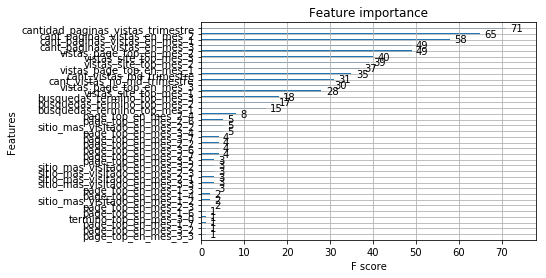

In [44]:
xgb.plot_importance(modelo)